### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

# Problem 1

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary for Market Segmentation:

#### 1. spending: Amount spent by the customer per month (in 1000s)
#### 2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
#### 3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
#### 4. current_balance: Balance amount left in the account to make purchases (in 1000s)
#### 5. credit_limit: Limit of the amount in credit card (10000s)
#### 6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
#### 7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


## 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [4]:
df=pd.read_csv(r"C:\Users\bvars\Downloads\bank_marketing_part1_Data.csv")

In [5]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [7]:
df.shape

(210, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### UNIVARIATE AND BIVARIATE ANALYSIS

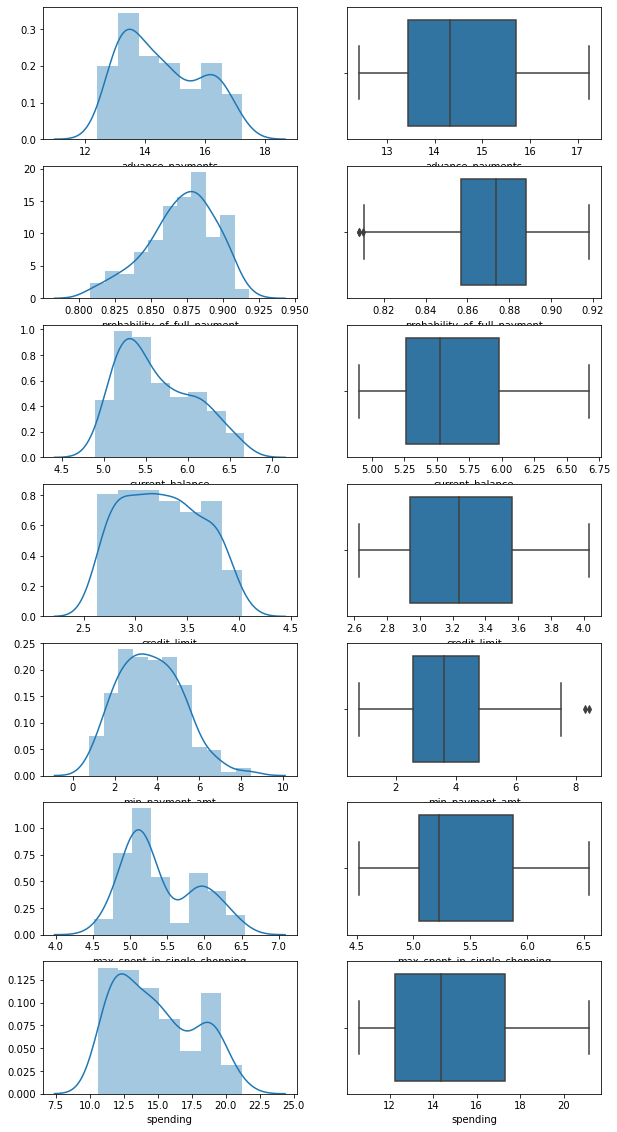

In [20]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10, 20)

a1 = sns.distplot(df['advance_payments'] , ax=axes[0][0])


a2= sns.boxplot(df['advance_payments'] , ax=axes[0][1])


a3= sns.distplot(df['probability_of_full_payment'] , ax=axes[1][0])

a4= sns.boxplot(df['probability_of_full_payment']  , ax=axes[1][1])


a5= sns.distplot(df['current_balance'] , ax=axes[2][0])


a6= sns.boxplot(df['current_balance'] ,ax=axes[2][1])

a7= sns.distplot(df['credit_limit'] , ax=axes[3][0])

a8= sns.boxplot(df['credit_limit'] , ax=axes[3][1])

a7= sns.distplot(df['min_payment_amt'] , ax=axes[4][0])

a8= sns.boxplot(df['min_payment_amt'] , ax=axes[4][1])


a9= sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[5][0])

a10= sns.boxplot(df['max_spent_in_single_shopping'] , ax=axes[5][1])
 
a11= sns.distplot(df['spending'] , ax=axes[6][0])

a12= sns.boxplot(df['spending'] , ax=axes[6][1])
 

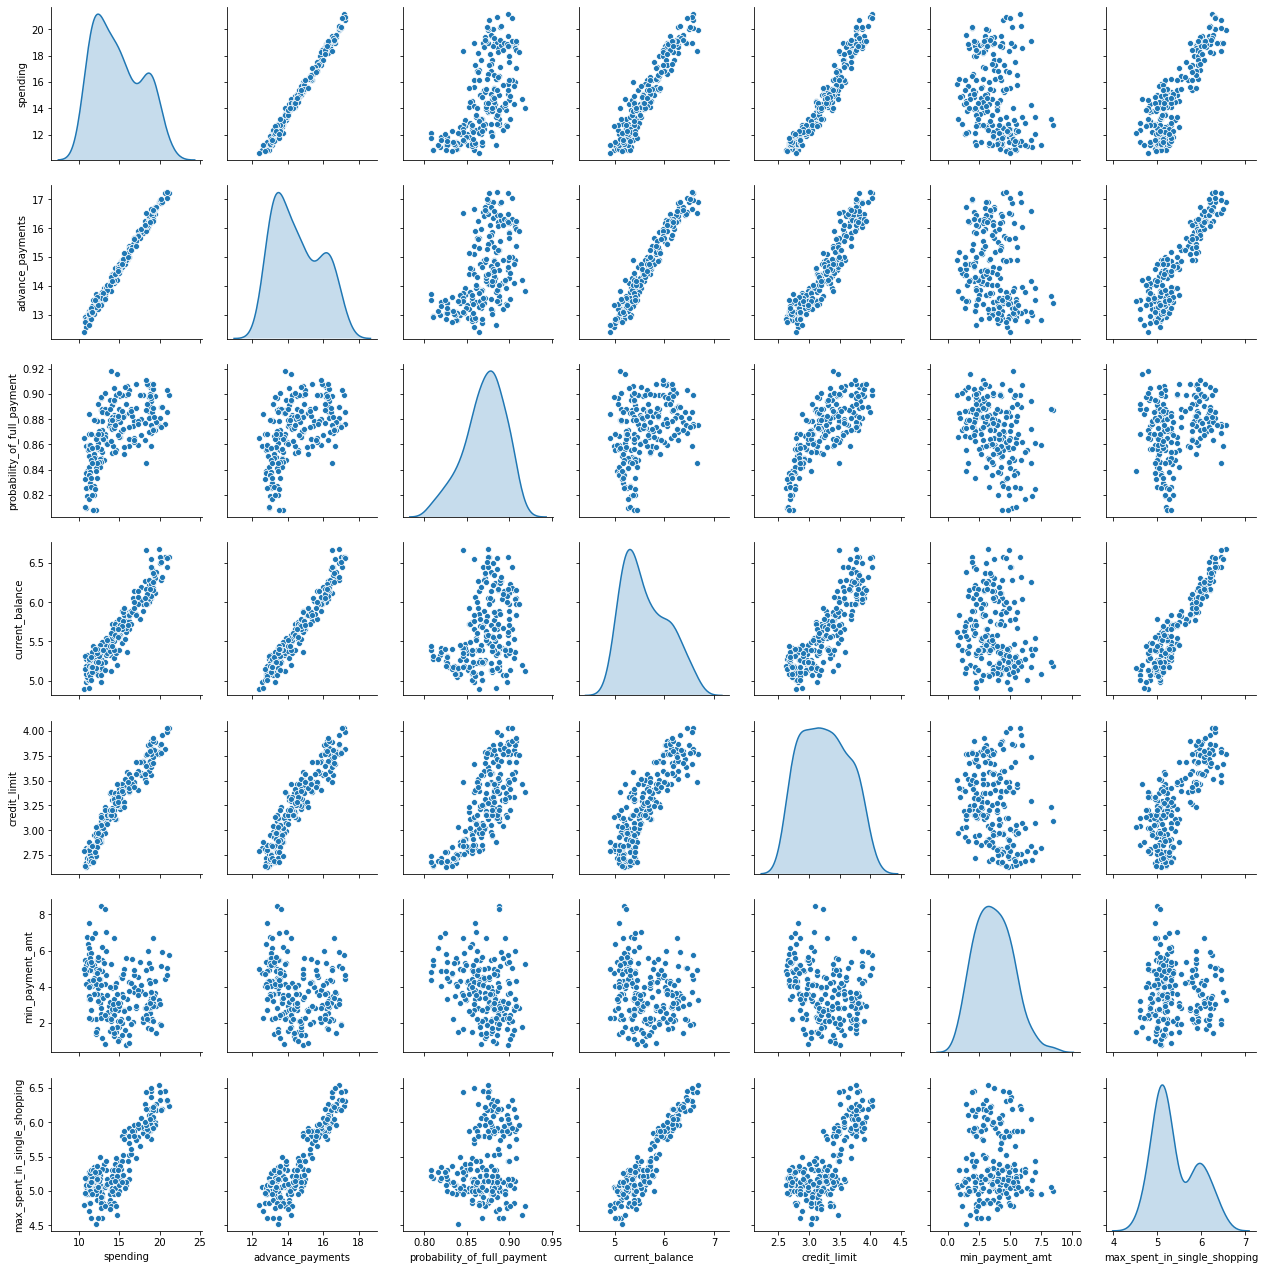

In [23]:
sns.pairplot(data=df,diag_kind='kde')

In [25]:
corr=df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


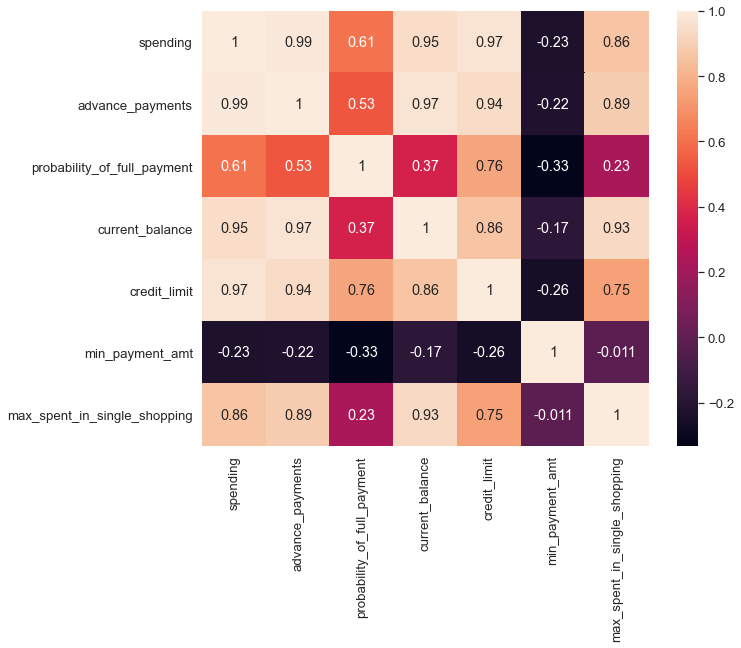

In [26]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(corr,annot=True)

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [27]:
#yes scaling is required since its a distance based model . since these are scaled on various scales scaling is required
#we use standard scalar for scaling the values

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X=StandardScaler()

In [38]:
scaled_df=X.fit_transform(df)

In [39]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [40]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [41]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [42]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [43]:
wardlink = linkage(scaled_df,method='ward')

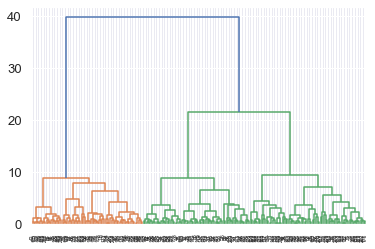

In [44]:
dend=dendrogram(wardlink)

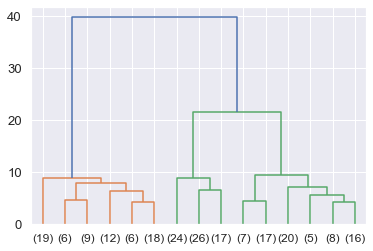

In [45]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=15,) # looking for last 15 merges

In [46]:
from scipy.cluster.hierarchy import fcluster

In [47]:
clusters=fcluster(wardlink,3,criterion="maxclust")

In [48]:
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [49]:
df['Clusters']=clusters

In [50]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [53]:
df['Clusters'].value_counts().sort_index(

1    70
2    67
3    73
Name: Clusters, dtype: int64

## Clustering using K-Means
### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [124]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=1)

In [125]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [126]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [127]:
k_means.inertia_

659.171754487041

In [128]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,k_means.labels_)

0.46577247686580914

In [129]:
k_means3=KMeans(n_clusters=3,random_state=1)

In [130]:
k_means3.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [131]:
k_means3.inertia_

430.6589731513006

In [132]:
labels3=k_means3.labels_
labels3


array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [133]:
silhouette_score(scaled_df,k_means3.labels_)

0.4007270552751299

In [134]:
# calculating wss
wss=[]


In [135]:
for i in range(1,15):
    KM=KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [136]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694,
 193.2835133180646,
 182.97995389115258,
 175.11842017053073,
 166.02965682631788]

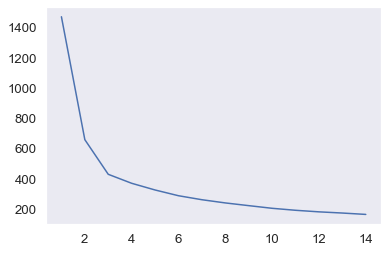

In [137]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()


there is no huge drop in the values after k=3 there we take 3 as the optimal cluster

In [138]:
#sillhoute score for k=3
silhouette_score(scaled_df,k_means3.labels_)

0.4007270552751299

In [139]:
#addding the cluster label to the dataframe
df['KMeans_Cluster']=k_means3.labels_
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,KMeans_Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


In [140]:
df['KMeans_Cluster'].value_counts().sort_index()

0    71
1    72
2    67
Name: KMeans_Cluster, dtype: int64

In [121]:
df.to_csv('Cluster.csv')

In [123]:
cluster1=pd.read_csv('Cluster.csv')
cluster1.head()

,Unnamed: 0,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,KMeans_Cluster
0,0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,2
1,1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,2
3,3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,2


# THE END

### Problem 2: CART-RF-ANN
#### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### DATA DICTIONARY
#### 1. Target: Claim Status (Claimed)
#### 2. Code of tour firm (Agency_Code)
#### 3. Type of tour insurance firms (Type)
#### 4. Distribution channel of tour insurance agencies (Channel)
#### 5. Name of the tour insurance products (Product)
#### 6. Duration of the tour (Duration)
#### 7. Destination of the tour (Destination)
#### 8. Amount of sales of tour insurance policies (Sales)
#### 9. The commission received for tour insurance firm (Commission)
#### 10. Age of insured (Age)

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [23]:
ins_df=pd.read_csv(r"C:\Users\bvars\Downloads\insurance_part2_data.csv")

In [24]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [25]:
ins_df.shape

(3000, 10)

In [26]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [27]:
ins_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [28]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [29]:
ins_df.duplicated().sum()

139

In [30]:
ins_df.drop_duplicates(inplace=True)

In [31]:
ins_df.duplicated().sum()

0

In [32]:
ins_df.shape

(2861, 10)

### UNIVARIATE AND BIVARIATE ANALYSIS

In [14]:
#checking for outliers

Text(0.5, 1.0, 'Sales Distribution')

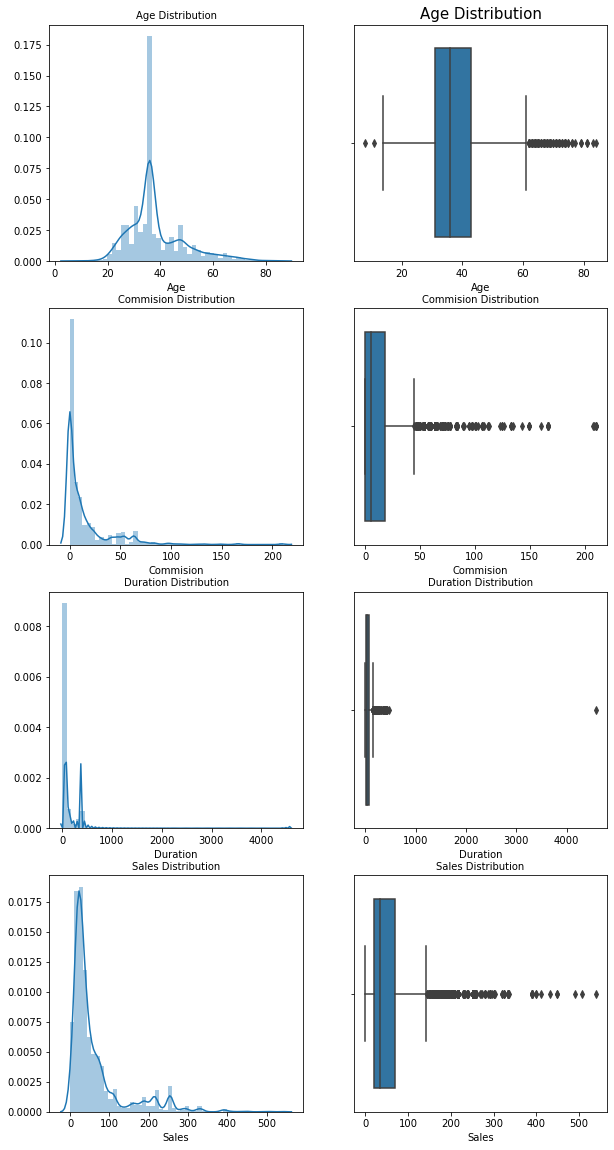

In [15]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10, 20)

a1 = sns.distplot(ins_df['Age'] , ax=axes[0][0])
a1.set_title("Age Distribution",fontsize=10)

a2= sns.boxplot(ins_df['Age'] , ax=axes[0][1])
a2.set_title("Age Distribution",fontsize=15)

a3= sns.distplot(ins_df['Commision'] , ax=axes[1][0])
a3.set_title("Commision Distribution",fontsize=10)

a4= sns.boxplot(ins_df['Commision']  , ax=axes[1][1])
a4.set_title("Commision Distribution",fontsize=10)

a5= sns.distplot(ins_df['Duration'] , ax=axes[2][0])
a5.set_title("Duration Distribution",fontsize=10)

a6= sns.boxplot(ins_df['Duration'] ,ax=axes[2][1])
a6.set_title("Duration Distribution",fontsize=10)

a7= sns.distplot(ins_df['Sales'] , ax=axes[3][0])
a7.set_title("Sales Distribution",fontsize=10)

a8= sns.boxplot(ins_df['Sales'] , ax=axes[3][1])
a8.set_title("Sales Distribution",fontsize=10)


outliers need not be treated as the following models are insensitive to outliers

#### Categorical variable analysis

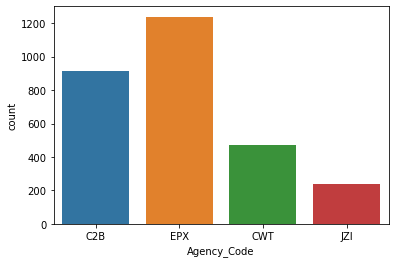

In [16]:

b1=sns.countplot(ins_df["Agency_Code"])


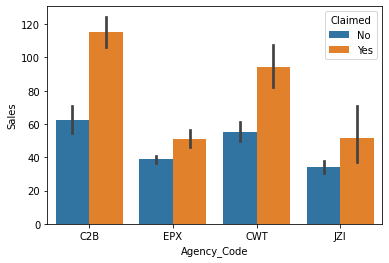

In [17]:
b2=sns.barplot(x="Agency_Code",y='Sales',hue='Claimed',data=ins_df)

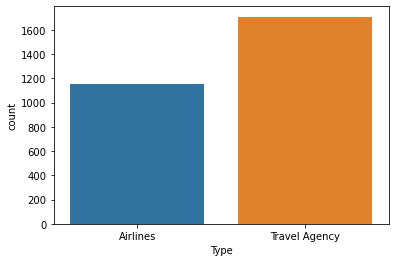

In [18]:
sns.countplot(ins_df['Type'])

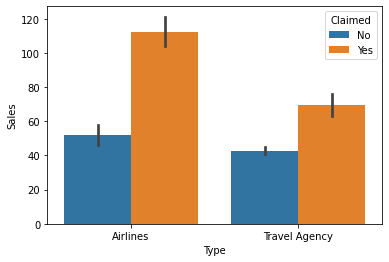

In [19]:
sns.barplot(x="Type",y='Sales',hue='Claimed',data=ins_df)

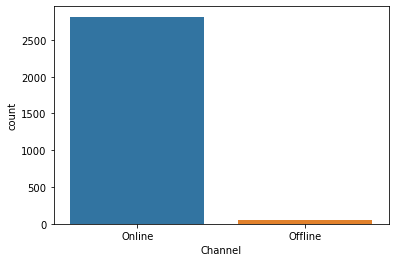

In [20]:
sns.countplot(ins_df['Channel'])

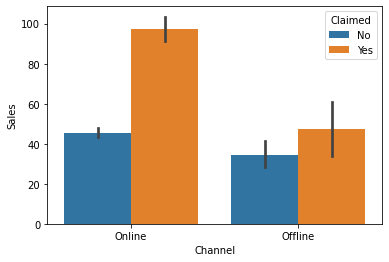

In [21]:
b2=sns.barplot(x="Channel",y='Sales',hue='Claimed',data=ins_df)

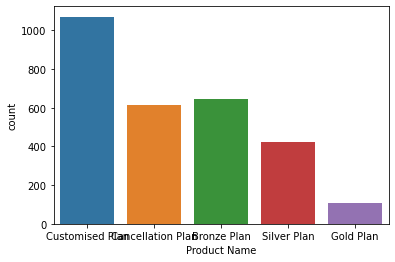

In [22]:
sns.countplot(ins_df["Product Name"])

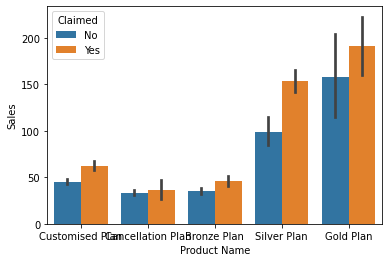

In [27]:
sns.barplot(x="Product Name",y='Sales',hue='Claimed',data=ins_df)

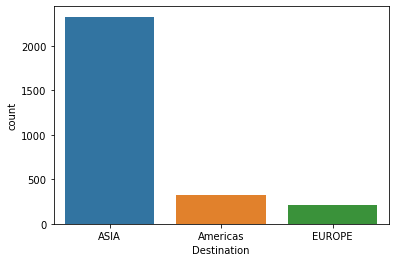

In [28]:
sns.countplot(ins_df["Destination"])

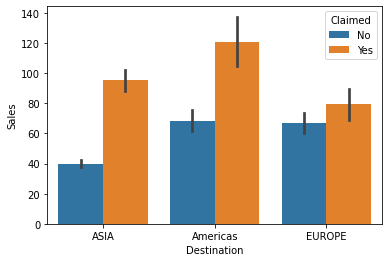

In [29]:
sns.barplot(x="Destination",y='Sales',hue='Claimed',data=ins_df)

### Changing features with object as data type to categorical


In [33]:
for features in ins_df.columns:
    if ins_df[features].dtype=='object':
        print('\n')
        print('feature:',features)
        print(pd.Categorical(ins_df[features].unique()))
        print(pd.Categorical(ins_df[features].unique()).codes)
        ins_df[features] = pd.Categorical(ins_df[features]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [34]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [35]:
ins_df['Claimed'].value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [36]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


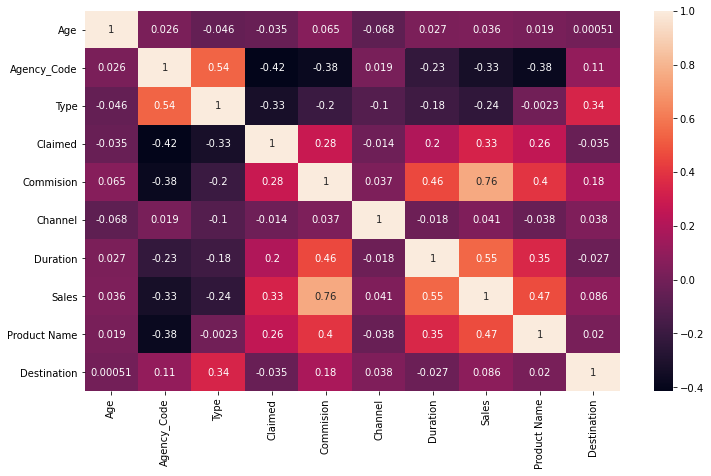

In [37]:
plt.figure(figsize=(12,7))
sns.heatmap(ins_df.corr(),annot=True)
plt.show()

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [38]:
X=ins_df.drop("Claimed",axis=1)

y=ins_df.pop("Claimed")

In [60]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=123)

In [61]:
#checking dimensions of the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


X_train (2288, 9)
X_test (573, 9)
train_labels (2288,)
test_labels (573,)


### Model1 - Decision Tree

In [62]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [63]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [64]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [65]:
# importance of feature in the tree building
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.193894
Agency_Code   0.174144
Type          0.000000
Commision     0.079396
Channel       0.007113
Duration      0.256904
Sales         0.219092
Product Name  0.048700
Destination   0.020756


In [66]:
y_predict=dt_model.predict(X_test)

In [96]:
#using gridsearchcv for hyper parameter tuning
param={"criterion":['gini','entropy'],"max_depth":range(7,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}

In [97]:
grid=GridSearchCV(dt_model,param_grid=param,cv=10,verbose=1,n_jobs=-1)

In [98]:

grid.fit(X_train,train_labels)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   23.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(7, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [99]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [100]:
grid.best_score_

0.7674959779361067

In [101]:
best_model=grid.best_estimator_

In [103]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.057984
Agency_Code   0.405034
Type          0.000000
Commision     0.076675
Channel       0.016815
Duration      0.098514
Sales         0.210126
Product Name  0.130520
Destination   0.004332


In [117]:
train_labels_predict=best_model.predict(X_train)
test_labels_predict=best_model.predict(X_test)

In [123]:
test_labels_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
#getting probabilities
test_labels_predict_prob=best_model.predict_proba(X_test)
test_labels_predict_prob

array([[0.95852535, 0.04147465],
       [0.91438356, 0.08561644],
       [0.95852535, 0.04147465],
       ...,
       [0.75576037, 0.24423963],
       [0.41176471, 0.58823529],
       [0.21338912, 0.78661088]])

In [125]:
pd.DataFrame(test_labels_predict_prob).head(10)

,0,1
0,0.958525,0.041475
1,0.914384,0.085616
2,0.958525,0.041475
3,0.958525,0.041475
4,0.755760,0.244240
5,0.675325,0.324675
6,0.928571,0.071429
7,0.675325,0.324675
8,0.914384,0.085616
9,0.914384,0.085616


In [126]:
#confusion matrix for train dataset
confusion_matrix(train_labels,train_labels_predict)

array([[1350,  205],
       [ 251,  482]], dtype=int64)

In [127]:
best_model.score(X_train,train_labels)

0.8006993006993007

In [128]:
print(classification_report(train_labels,train_labels_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1555
           1       0.70      0.66      0.68       733

    accuracy                           0.80      2288
   macro avg       0.77      0.76      0.77      2288
weighted avg       0.80      0.80      0.80      2288



In [130]:
#confusion matrix for test dataset
confusion_matrix(test_labels,test_labels_predict)

array([[325,  67],
       [ 60, 121]], dtype=int64)

In [131]:
best_model.score(X_test,test_labels)

0.7783595113438045

In [132]:
print(classification_report(test_labels,test_labels_predict))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       392
           1       0.64      0.67      0.66       181

    accuracy                           0.78       573
   macro avg       0.74      0.75      0.75       573
weighted avg       0.78      0.78      0.78       573



### AUC ROC curve for train and test data

AUC: 0.859


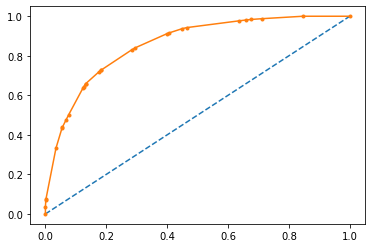

In [133]:
#auc roc for train data
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.789


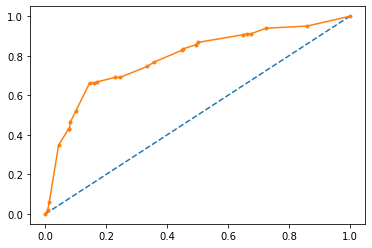

In [135]:
#auc roc for test data
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model2: Random Forest 

In [34]:
x2=ins_df.drop("Claimed",axis=1)

y2=ins_df.pop("Claimed")

In [35]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, y, test_size=.20, random_state=123)

In [36]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(x2_train, y2_train)

In [79]:
param_grid = {
    'max_depth': [5,7,10],
    'min_samples_leaf': [25,35,50],
    'min_samples_split': [75,100,150,200],
    'n_estimators': [50,75,100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [80]:
grid_search.fit(x2_train, y2_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_leaf': [25, 35, 50],
                         'min_samples_split': [75, 100, 150, 200],
                         'n_estimators': [50, 75, 100]})

In [81]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 100}

In [82]:
grid_search.best_score_

0.7701090116029073

In [83]:
best_grid=grid_search.best_estimator_

In [84]:
ytrain_predict2 = best_grid.predict(x2_train)
ytest_predict2 = best_grid.predict(x2_test)

In [85]:
#confusion matrix for train data
confusion_matrix(y2_train,ytrain_predict2)

array([[1387,  168],
       [ 337,  396]], dtype=int64)

In [86]:
print(classification_report(y2_train,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1555
           1       0.70      0.54      0.61       733

    accuracy                           0.78      2288
   macro avg       0.75      0.72      0.73      2288
weighted avg       0.77      0.78      0.77      2288



In [87]:
confusion_matrix(y2_test,ytest_predict2)

array([[343,  49],
       [ 74, 107]], dtype=int64)

In [88]:
print(classification_report(y2_test,ytest_predict2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       392
           1       0.69      0.59      0.64       181

    accuracy                           0.79       573
   macro avg       0.75      0.73      0.74       573
weighted avg       0.78      0.79      0.78       573



AUC: 0.835


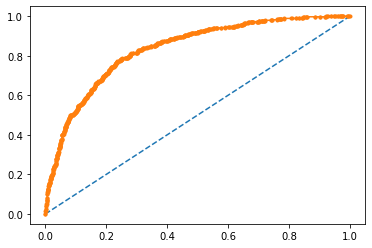

In [89]:
    # AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x2_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


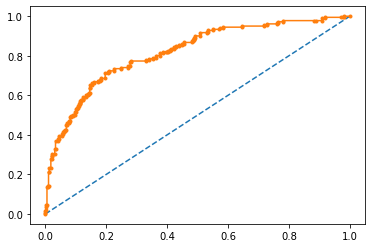

In [90]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(x2_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model3-ANN


In [91]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier()

grid_search = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [92]:
grid_search.fit(x2_train, y2_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [93]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [94]:
grid_search.best_score_

0.7556853558442809

In [95]:
best_grid=grid_search.best_estimator_

In [96]:
ytrain_predict3 = best_grid.predict(x2_train)
ytest_predict3 = best_grid.predict(x2_test)

In [97]:
print(classification_report(y2_train,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1555
           1       0.71      0.48      0.57       733

    accuracy                           0.77      2288
   macro avg       0.75      0.69      0.71      2288
weighted avg       0.76      0.77      0.76      2288



In [99]:
print(classification_report(y2_test,ytest_predict3))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       392
           1       0.70      0.50      0.58       181

    accuracy                           0.77       573
   macro avg       0.75      0.70      0.71       573
weighted avg       0.77      0.77      0.76       573



AUC: 0.799


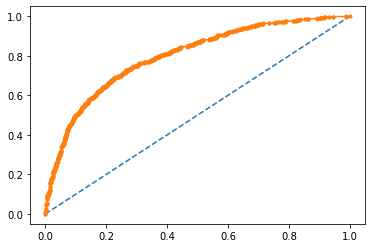

In [100]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x2_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.800


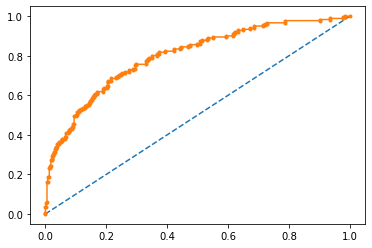

In [101]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(x2_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y2_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()